In [1]:
# Kmeans 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist     


In [2]:
k=3     # Finding accuracy for k=3.
Mu1=[5 ,6]
Mu2=[25 ,10]
Mu3=[15, 20]
Sigma=2*np.eye(2)
N=50
clust1=np.random.multivariate_normal(Mu1,Sigma,N)
clust2=np.random.multivariate_normal(Mu2,Sigma,N)
clust3=np.random.multivariate_normal(Mu3,Sigma,N)
# tr_clust1=clust1[0:35,:]  # first 35 points as the train data from the cluster 1.
# tr_clust2=clust2[0:35,:]
# tr_clust3=clust3[0:35,:]
# train_new=np.vstack(tr_clust1)  # appending all three clusters.
# train_new=np.vstack((train_new,tr_clust2))
# train_new=np.vstack((train_new,tr_clust3))
# train_new.shape

In [3]:
tr_clust1=clust1[0:35,:]  # first 35 points as the train data from the cluster 1.
tr_clust2=clust2[0:35,:]
tr_clust3=clust3[0:35,:]
train_new=np.vstack(tr_clust1)  # appending all three clusters.
train_new=np.vstack((train_new,tr_clust2))
train_new=np.vstack((train_new,tr_clust3))
train_new.shape

(105, 2)

In [4]:
tst_clust1=clust1[35:,:]  # Rest 15 goes to the test data.
tst_clust2=clust2[35:,:]
tst_clust3=clust3[35:,:]
test_new=np.vstack(tst_clust1)    # Appending all 3 clusters.
test_new=np.vstack((test_new,tst_clust2))
test_new=np.vstack((test_new,tst_clust3))
test_new.shape

(45, 2)

In [5]:
zero_class=np.repeat(0,15).reshape(15,1)  # Creating class labels.
one_class = np.repeat(1,15).reshape(15,1)
two_class = np.repeat(2,15).reshape(15,1)

Y = np.vstack((zero_class))           # Labels for test data.
Y = np.vstack((Y,one_class))
Y = np.vstack((Y,two_class)) 
Y.shape

(45, 1)

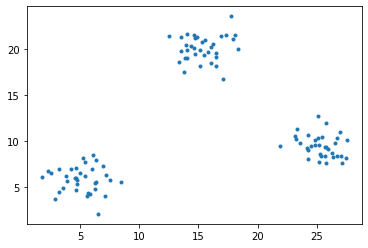

In [6]:
x,y=train_new.T
plt.plot(x,y,'.')

In [7]:
def measure_change(old_centers, centers):
    res = 0
    for a,b in zip(old_centers,centers):
        res+=np.sqrt(np.sum(np.square(a-b)))
    
    return res

In [245]:
# def kmeans(X, k):       # X has train data.
#     # init centers.
#     n = X.shape[0]      # number of rows of train.
  
#     centers = X[np.random.choice(n, k, replace=False)]   # Initialising centers.
#     closest = np.zeros(n).astype(int)             # To store indexes of centers for which the data point have minimum distance
    
#     while True:
#         old_closest = closest.copy()

#         #  update cluster membership
#         distances = np.zeros((n,k))     
#         distances = cdist(X, centers)    # finds distance of each data point in the train data from centroids.For k=3, 
#                                         # gives three columns. first column has the distance of data points with first center.
        
#         closest = np.argmin(distances, axis=1)  # Finding new cluster membership. (1,105) matrix.
        
#         #  update centers
#         for i in range(k):
#             centers[i, :] = X[closest == i].mean(axis=0)
            
#         # break if converged
#         if all(closest == old_closest):    # Cluster membership don't change.
#             break
            
#     return closest, centers

In [8]:
def kmeans(X, k):       # X has train data.
    # init centers.
    n = X.shape[0]      # number of rows of train.
  
    centers = X[np.random.choice(n, k, replace=False)]   # Initialising centers.
    closest = np.zeros(n).astype(int)             # To store indexes of centers for which the data point have minimum distance
    
    while True:
#         old_closest = closest.copy()
        
        old_centers = centers.copy()
        
#         print(old_centers)
        #  update cluster membership
        distances = np.zeros((n,k))     
        distances = cdist(X, centers)    # finds distance of each data point in the train data from centroids.For k=3, 
                                        # gives three columns. first column has the distance of data points with first center.
        
        closest = np.argmin(distances, axis=1)  # Finding new cluster membership. (1,105) matrix.
        
        #  update centers
        for i in range(k):
            centers[i, :] = X[closest == i].mean(axis=0)
            
        # break if converged
#         if all(closest == old_closest):    
#             break
        res=measure_change(old_centers, centers)
        if(res < .001):   # Stopping condition is centers don't change.
            break
            
    return closest, centers

In [61]:
cl,cen = kmeans(train_new, 3)  # Finding final centroids.
print(cl)
print(cen)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 5.10129576  5.84719274]
 [15.37563396 20.12937215]
 [25.33773663  9.48786711]]


In [69]:
test_new

array([[ 4.92467022,  6.92429878],
       [ 4.29724583,  5.85550741],
       [ 5.14228757,  6.99857994],
       [ 6.86146129,  6.7514967 ],
       [ 2.63031044,  8.47096065],
       [ 4.23447695,  5.16666459],
       [ 6.85445089,  4.48508557],
       [ 5.99190688,  5.24969055],
       [ 3.69033875,  4.71361541],
       [ 3.21139092,  6.16658982],
       [ 6.11291437,  6.37746892],
       [ 5.46905515,  2.41877666],
       [ 3.90369867,  6.38558748],
       [ 4.24854403,  5.44214131],
       [ 3.62587706,  8.12078598],
       [24.88107143, 13.75708781],
       [23.98194711, 10.61932713],
       [25.25880798, 12.31242978],
       [22.6377247 ,  9.96659184],
       [21.20675684, 10.09873491],
       [25.98588056,  7.80451237],
       [25.32195859,  9.45515754],
       [26.36157039,  7.68809756],
       [23.18085163,  9.8300878 ],
       [26.86747928, 10.80332159],
       [22.21978715, 10.76769532],
       [25.50017112, 10.94743825],
       [25.14339775, 10.14478161],
       [26.42541509,

In [30]:
# plt.plot(train_new[:,0],train_new[:,1],'.')
# plt.plot(cen[:,0],cen[:,1],'*')

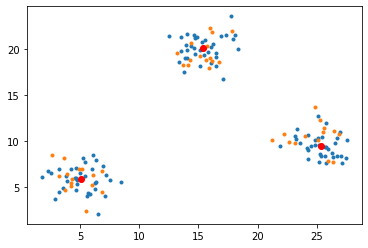

In [62]:
# Test and train data and final cluster centers.
plt.plot(train_new[:,0],train_new[:,1],'.')  # train is blue, test is orange, final centers are red.
plt.plot(test_new[:,0],test_new[:,1],'.')
plt.plot(cen[:,0],cen[:,1],'o',color='r')

In [11]:
test_new.shape

(45, 2)

In [63]:
n = test_new.shape[0]
#  predicting.
distances = np.zeros((n,k))
distances = cdist(test_new, cen)   # For k=3, distances have 3 columns first column has the distance of data points with
print(distances)                                   # the final centers.
y_pred = np.argmin(distances, axis=1)
y_pred

[[ 1.09149164 16.84032677 20.57340913]
 [ 0.80409292 18.06858871 21.35172804]
 [ 1.15211666 16.64749478 20.34828527]
 [ 1.97887553 15.85744897 18.67780698]
 [ 3.60415406 17.27315345 22.73018484]
 [ 1.10204056 18.65497244 21.54113183]
 [ 2.2201101  17.81443974 19.14835959]
 [ 1.07247239 17.59145413 19.80462747]
 [ 1.80991636 19.34403474 22.1676186 ]
 [ 1.91670415 18.51831793 22.37422753]
 [ 1.14217557 16.58049506 19.47481368]
 [ 3.44808407 20.29299131 21.08877768]
 [ 1.31305281 17.90242767 21.65738032]
 [ 0.94406154 18.42625519 21.47375007]
 [ 2.7103665  16.8006824  21.75485594]
 [21.30272202 11.44374717  4.29357525]
 [19.47440017 12.82612889  1.76588986]
 [21.16895342 12.60086175  2.82566523]
 [18.01376665 12.49079924  2.74212359]
 [16.65717525 11.60239965  4.17590152]
 [20.97610503 16.26282576  1.80382198]
 [20.54002471 14.5900045   0.03631615]
 [21.3398268  16.59747308  2.07060523]
 [18.51307088 12.92271957  2.18386536]
 [22.32330527 14.79992324  2.01755621]
 [17.81162803 11.59669893

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [64]:
from scipy.optimize import linear_sum_assignment
# To compute the accuracy, one need to sum the values on the diagonal, 
# but for clustering the rows (or columns) of the confusion matrix should be permuted to obtain the maximum value for the sum.
# This is not the case here. Let's see how to find the best permutation.
def cluster_accuracy_(y_true,y_pred):
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size  # assert is used to continue the execution if the given condition evaluates to true.
    D=max(y_pred.max(),y_true.max()) + 1   # Size of W.
    w=np.zeros((D,D))                      # for k=3, W is 3x3.
    
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    
#     ind = linear_assignment(w.max() - w)
#     print(ind)
    
#     i1 = ind[0]

#     print(i1)
#     i2 = ind[1]
#     print(i2)
#     L = np.vstack((ind[0],ind[1]))
#     print(L)
    
#     return (sum([w[i,j] for i,j in ind]) * 1.0) / y_pred.size
    row_ind,col_ind = linear_sum_assignment(w.max() - w)  # Returns the row and column indices of W to find the accuarcy.
    return row_ind,col_ind,w             

In [65]:
row_ind,col_ind,w =cluster_accuracy_(Y,y_pred)   # converting to tuple.
new_row = list(row_ind)
new_col=list(col_ind)
assign_=zip(new_row,new_col)     # The zip() function returns an iterator of tuples based on the iterable objects.
ind=tuple(assign_)

# i1 = row_ind[0]
# print(i1)
# i2 = col_ind[0]
# print(i2)
# L = np.vstack((row_ind[0],col_ind [0]))
# print(L)
print(ind)
L = np.vstack((row_ind,col_ind))

# S = [w[L[0][0],L[1][0]], w[L[0][1],L[1][1]], w[L[0][2],L[1][2]]]
# sum(S)/y_pred.size
accuracy_linear_assign = (np.sum([w[i,j] for i,j in ind]) * 1.0) / y_pred.size
accuracy_linear_assign   # Returns the accuracy.


((0, 0), (1, 2), (2, 1))


1.0

In [45]:
print(y_pred)
print(Y.T)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 5 5 5 5 5 5 4 5 4 4 4 4 2 3 3 2 1 1 1
 2 1 1 1 1 3 1 1]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2]]


In [70]:
test_new.shape

(45, 2)

In [24]:

print(w)

[[15.  0.  0.]
 [ 0.  0. 15.]
 [ 0. 15.  0.]]


In [18]:
 from sklearn.metrics import confusion_matrix

In [19]:
cm=confusion_matrix(Y, y_pred)  
cm

array([[15,  0,  0],
       [ 0,  0, 15],
       [ 0, 15,  0]], dtype=int64)

In [20]:
cm.trace()/cm.sum()

0.3333333333333333

Text(0, 0.5, 'Accuracy')

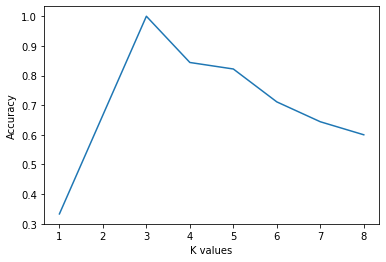

In [71]:
k=[1,2,3,4,5,6,7,8]
acc=[.333,.6667,1,.844,.822,.711,.644,.60]
plt.plot(k,acc)
plt.xlabel("K values")
plt.ylabel("Accuracy") 

In [21]:
# Elbow method.
wcss=[]      # To store the WCSS.
for i in range(1,11):  
    closest,final_centers = kmeans(train_new,i)

    sum=0
    for j in range(0,i):

        clust_final=train_new[closest==j]      # Data points corresponding to j.
        diss=cdist(clust_final, final_centers) # For k=3, three columns.

        init_sum=np.sum(diss,axis=0)  # column sum of diss.

        sum += init_sum[j]            # taking only jth column sum.
    wcss.append(sum)

Text(0, 0.5, 'WCSS')

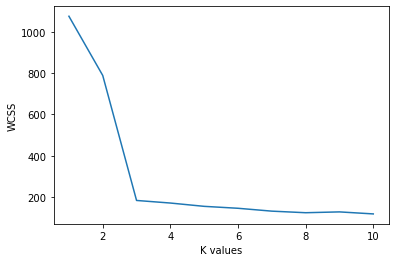

In [22]:
k1=[1,2,3,4,5,6,7,8,9,10]
plt.plot(k1,wcss)
plt.xlabel("K values")
plt.ylabel("WCSS")             # The optimal value of k is 3.

In [23]:
wcss

[1075.1309909486122,
 788.4943762198033,
 183.6168206723764,
 171.09741593791523,
 155.09457064360117,
 145.73022334743285,
 131.8553851635006,
 124.23153375030121,
 128.23185921164364,
 118.4538824680397]

# Linear regression.

In [73]:
import pandas 

In [90]:
# Reading the data set.
linear_data = pandas.read_excel("C:/Users/Bichu George/Desktop/Datalinearregression.xlsx")
linear_data                 

,Unnamed: 0,Demand estimation using linear regression,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4,NaN,NaN
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month,NaN,NaN
3,1,192000,15,1800000,5800,50,NaN,NaN
4,2,190400,15,1790000,6200,50,NaN,NaN
5,3,191200,15,1780000,6400,60,NaN,NaN
6,4,177600,25,1778000,6500,60,NaN,NaN
7,5,176800,25,1750000,6550,60,NaN,NaN
8,6,178400,25,1740000,6580,70,NaN,NaN
9,7,180800,25,1725000,8200,75,NaN,NaN


In [91]:
linear_data = linear_data.iloc[:,0:6]
linear_data


,Unnamed: 0,Demand estimation using linear regression,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50
5,3,191200,15,1780000,6400,60
6,4,177600,25,1778000,6500,60
7,5,176800,25,1750000,6550,60
8,6,178400,25,1740000,6580,70
9,7,180800,25,1725000,8200,75


In [92]:
# selecting rows 3 to 29
linear_data = linear_data.iloc[3:30,1:]
linear_data


,Demand estimation using linear regression,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
3,192000,15,1800000,5800,50
4,190400,15,1790000,6200,50
5,191200,15,1780000,6400,60
6,177600,25,1778000,6500,60
7,176800,25,1750000,6550,60
8,178400,25,1740000,6580,70
9,180800,25,1725000,8200,75
10,175200,30,1725000,8600,75
11,174400,30,1720000,8800,75
12,173920,30,1705000,9200,80


In [93]:
# Giving column names
linear_data.columns=['Y','X1','X2','X3','X4']
linear_data


,Y,X1,X2,X3,X4
3,192000,15,1800000,5800,50
4,190400,15,1790000,6200,50
5,191200,15,1780000,6400,60
6,177600,25,1778000,6500,60
7,176800,25,1750000,6550,60
8,178400,25,1740000,6580,70
9,180800,25,1725000,8200,75
10,175200,30,1725000,8600,75
11,174400,30,1720000,8800,75
12,173920,30,1705000,9200,80


In [94]:
# Standardization.
# (x - mean)/std

def standardise_data(A):
    mean = np.mean(A,axis=0)    # Finding mean of all columns
    std = np.std(A,axis=0)      # Finding std of all columns
    norm_A = (A - mean)/(std)
    return norm_A
    

In [95]:
Data1=linear_data
print(Data1)


         Y   X1       X2     X3   X4
3   192000   15  1800000   5800   50
4   190400   15  1790000   6200   50
5   191200   15  1780000   6400   60
6   177600   25  1778000   6500   60
7   176800   25  1750000   6550   60
8   178400   25  1740000   6580   70
9   180800   25  1725000   8200   75
10  175200   30  1725000   8600   75
11  174400   30  1720000   8800   75
12  173920   30  1705000   9200   80
13  172800   30  1710000   9630   80
14  163200   40  1700000  10570   80
15  161600   40  1695000  11330   85
16  161600   40  1695000  11600  100
17  160800   40  1690000  11800  105
18  159200   40  1630000  11830  105
19  148800   65  1640000  12650  105
20  115696  102  1635000  13000  110
21  147200   75  1630000  13224  125
22  150400   75  1620000  13766  130
23  152000   75  1615000  14010  150
24  136000   80  1605000  14468  155
25  126240   86  1590000  15000  165
26  123888   98  1595000  15200  175
27  126080   87  1590000  15600  175
28  151680   77  1600000  16000  190
2

In [96]:
# Standardising the data and converting to numpy array.
std_data=standardise_data(Data1)
print(std_data)
print("====================================")
Data2=std_data.to_numpy().astype(float)
print(Data2)


           Y        X1        X2        X3        X4
3    1.52964 -1.288235  1.801875 -1.569829 -1.281777
4   1.453096 -1.288235   1.65158 -1.450524 -1.281777
5   1.491368 -1.288235  1.501285 -1.390872  -1.05705
6   0.840741 -0.919387  1.471225 -1.361046  -1.05705
7   0.802468 -0.919387  1.050398 -1.346132  -1.05705
8   0.879013 -0.919387  0.900103 -1.337185 -0.832322
9   0.993829 -0.919387   0.67466 -0.854001 -0.719959
10  0.725924 -0.734963   0.67466 -0.734696 -0.719959
11  0.687652 -0.734963  0.599512 -0.675044 -0.719959
12  0.664689 -0.734963  0.374069 -0.555739 -0.607595
13  0.611108 -0.734963  0.449216 -0.427486 -0.607595
14  0.151841 -0.366115  0.298921  -0.14712 -0.607595
15  0.075297 -0.366115  0.223773  0.079559 -0.495232
16  0.075297 -0.366115  0.223773  0.160089 -0.158141
17  0.037025 -0.366115  0.148626  0.219742 -0.045778
18  -0.03952 -0.366115 -0.753147  0.228689 -0.045778
19 -0.537058  0.556004 -0.602852  0.473264 -0.045778
20 -2.120761   1.92074 -0.677999  0.577656  0.

In [97]:
# Train test split. 70:30 ratio.
n=Data2.shape[0]   # number of rows. 27
n
seventy_per=round(n*.7)   # finding 70 % of n
print(seventy_per)
thirty_per=n-seventy_per
print(thirty_per)
P = np.random.permutation(n)    # random permutation between 0 and n.
print(P)

19
8
[ 2 17 15 21  4 23 10 24 26  5 16 11  1  7 20  9  8  0 13 12 22 25 18  6
  3 14 19]


In [98]:
train_idx = P[0:seventy_per]     # train index
print(train_idx)
test_idx=P[seventy_per:]         # test index
print(test_idx)

[ 2 17 15 21  4 23 10 24 26  5 16 11  1  7 20  9  8  0 13]
[12 22 25 18  6  3 14 19]


In [99]:
X=Data2[:,1:]       # from second column onwards
Y=Data2[:,0]        # first column. Y values


In [100]:
X_train = X[train_idx,:]     # X values of train data
X_test = X[test_idx,:]       # X values of test data
print(X_train)
print("======================================================")
print(X_test)
print("======================================================")
Y_train = Y[train_idx]     # Y value of train

Y_test = Y[test_idx]       # Y value of test
print(Y_train)
print("======================================================")
print(Y_test)
print(Y_train.shape)

[[-1.28823454  1.50128459 -1.39087173 -1.0570495 ]
 [ 1.92073993 -0.67799949  0.57765563  0.0665858 ]
 [-0.36611544 -0.75314722  0.22868941 -0.04577773]
 [ 1.10927513 -1.12888585  1.01550383  1.07785757]
 [-0.9193869   1.05039823 -1.34613247 -1.0570495 ]
 [ 1.77320088 -1.27918131  1.23383141  1.52731169]
 [-0.73496308  0.44921641 -0.42748637 -0.60759538]
 [ 1.36746847 -1.35432904  1.3531361   1.52731169]
 [ 0.48223414 -1.05373813  1.53209313  2.08912934]
 [-0.9193869   0.90010277 -1.33718462 -0.83232244]
 [ 0.55600367 -0.60285177  0.47326402 -0.04577773]
 [-0.36611544  0.29892096 -0.14712036 -0.60759538]
 [-1.28823454  1.65158004 -1.45052408 -1.28177656]
 [-0.73496308  0.67465959 -0.73469595 -0.71995891]
 [ 0.92485131 -0.9785904   0.87889996  0.96549404]
 [-0.73496308  0.37406869 -0.55573891 -0.60759538]
 [-0.73496308  0.59951187 -0.6750436  -0.71995891]
 [-1.28823454  1.8018755  -1.56982876 -1.28177656]
 [-0.36611544  0.22377323  0.16008922 -0.15814126]]
[[-0.36611544  0.22377323  0.0

In [101]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]   # concatenating ones.
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]
X_train_0.shape

(19, 5)

In [102]:
X_train_0

array([[ 1.        , -1.28823454,  1.50128459, -1.39087173, -1.0570495 ],
       [ 1.        ,  1.92073993, -0.67799949,  0.57765563,  0.0665858 ],
       [ 1.        , -0.36611544, -0.75314722,  0.22868941, -0.04577773],
       [ 1.        ,  1.10927513, -1.12888585,  1.01550383,  1.07785757],
       [ 1.        , -0.9193869 ,  1.05039823, -1.34613247, -1.0570495 ],
       [ 1.        ,  1.77320088, -1.27918131,  1.23383141,  1.52731169],
       [ 1.        , -0.73496308,  0.44921641, -0.42748637, -0.60759538],
       [ 1.        ,  1.36746847, -1.35432904,  1.3531361 ,  1.52731169],
       [ 1.        ,  0.48223414, -1.05373813,  1.53209313,  2.08912934],
       [ 1.        , -0.9193869 ,  0.90010277, -1.33718462, -0.83232244],
       [ 1.        ,  0.55600367, -0.60285177,  0.47326402, -0.04577773],
       [ 1.        , -0.36611544,  0.29892096, -0.14712036, -0.60759538],
       [ 1.        , -1.28823454,  1.65158004, -1.45052408, -1.28177656],
       [ 1.        , -0.73496308,  0.6

In [103]:
alpha = np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0)),np.matmul(X_train_0.T,Y_train))  # projecting Y_train to column space of X train.
alpha    # inv(X' X) * X' Y
#  alpha = beta0 , beta1, ...., beta4.

array([-0.02825911, -0.90394159,  0.25855495, -0.153437  ,  0.3093205 ])

In [104]:
# Prediction of test data using alpha.
y_pred = np.matmul(X_test_0,alpha)
y_pred

array([ 0.19515295, -1.35844394, -0.89149192, -1.0330202 ,  0.88558677,
        1.06507326,  0.29323924, -1.06192779])

In [107]:
error = Y_train - np.matmul(X_train_0,alpha)  # The error vector is orthogonal to the column space of X_train_0.
print(np.round(np.matmul(error,X_train_0),10))
print(error)

[ 0.  0. -0.  0.  0.]
[ 0.08052935 -0.11292746 -0.09822808 -0.00414235 -0.15150964 -0.05009929
 -0.01879472 -0.27425634 -0.02020796 -0.1042454   0.23644253 -0.06276602
  0.06375734  0.0253514   0.56952954  0.03453747  0.01566192  0.08313632
 -0.21176862]


In [108]:
mse = np.sum((y_pred - Y_test)**2) / (X_test_0.shape[0])
mse     # It represents the squared distance between actual and predicted values.

0.12355560065006829

In [109]:
sse = np.sum((y_pred - Y_test)**2) #How much of total variation is not described by the regression line.
sst = np.sum((Y_test - Y_test.mean())**2) #Total variation in y.
print(sse)
print(sst)

0.9884448052005463
4.898860142261947


In [110]:
r_square = 1 - (sse/sst)
r_square  
#How much of the total variation in Y is described by the total variation in X. This is also called coefficient of determination.

0.798229633731868

# Naive Bayes

In [68]:

Naive_data = pandas.read_csv("C:/Users/Bichu George/Desktop/Data_Naive_Bayes.csv")
Naive_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [69]:
sp=Naive_data.iloc[:,0]                   # Going through our target values.
print(sp)
Naive_data["Species"].value_counts()


0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [70]:
cleanup_sp = {"Species":     {"Bream": 0, "Roach": 1, "Whitefish": 2, "Parkki": 3, "Perch": 4, "Pike": 5, "Smelt": 6} }
Naive_data = Naive_data.replace(cleanup_sp)
Naive_data.head()                                  # Converting categorical value to numerical data.

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:>

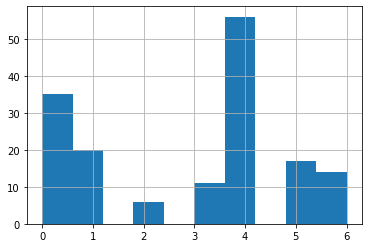

In [71]:
Naive_data["Species"].hist()       # Target vs count.

<AxesSubplot:xlabel='Width', ylabel='Count'>

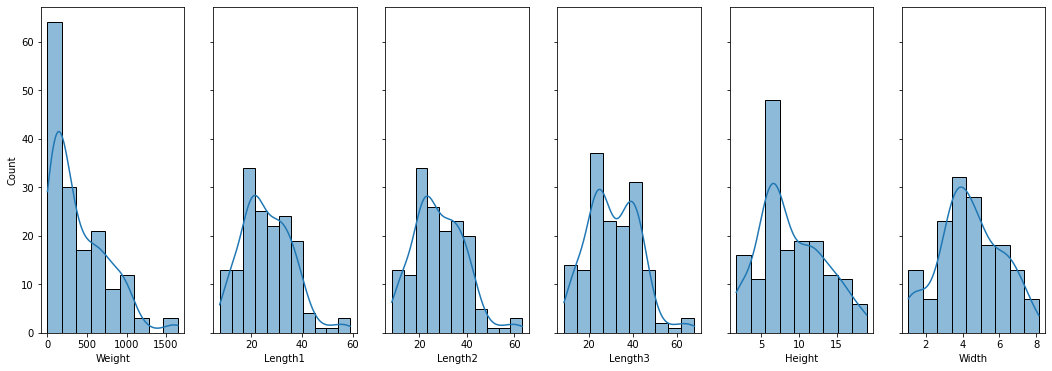

In [72]:
import seaborn as sns
fig, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)
sns.histplot(Naive_data, ax=axes[0], x="Weight", kde=True)
sns.histplot(Naive_data, ax=axes[1], x="Length1", kde=True)
sns.histplot(Naive_data, ax=axes[2], x="Length2", kde=True)
sns.histplot(Naive_data, ax=axes[3], x="Length3", kde=True)
sns.histplot(Naive_data, ax=axes[4], x="Height", kde=True)
sns.histplot(Naive_data, ax=axes[5], x="Width", kde=True)

In [227]:
# From the above graph it is clear that we can fit a normal distribution to the features to calculate the likelihood.

In [73]:
# Calculating the prior

def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))       # [0,1,2,3,4,5,6]
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))       # Calculates P(y=i) for i=0,1...,6.
    return prior

In [74]:
sorted(Naive_data["Species"].unique())
Naive_data["Species"]==0             # returns true for those with label 0
Naive_data[Naive_data["Species"]==0] # gives whole instances with label zero

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
5,0,450.0,26.8,29.7,34.7,13.6024,4.9274
6,0,500.0,26.8,29.7,34.5,14.1795,5.2785
7,0,390.0,27.6,30.0,35.0,12.6700,4.6900
8,0,450.0,27.6,30.0,35.1,14.0049,4.8438
9,0,500.0,28.5,30.7,36.2,14.2266,4.9594


In [75]:
len(Naive_data[Naive_data["Species"]==0])

35

In [76]:
calculate_prior(Naive_data, "Species")

[0.22012578616352202,
 0.12578616352201258,
 0.03773584905660377,
 0.06918238993710692,
 0.3522012578616352,
 0.1069182389937107,
 0.0880503144654088]

In [77]:
np.sum(calculate_prior(Naive_data, "Species"))

1.0

In [78]:
# Calculating likelihood.
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):   # feat_name is string. df is train

    df = df[df[Y]==label]      # Instances corresponding to label (0,1,2,3,4,5,6)  P(X/Y=0) Given part.
    mean, std = df[feat_name].mean(), df[feat_name].std()
    
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-( ( (feat_val-mean)**2) / (2 * (std**2) ) ))
    return p_x_given_y

In [79]:
def naive_bayes_gaussian(df, X, Y):                 # df is train, X is test, Y is Species.
    # get feature names
    features = list(df.columns)[1:]    # column names except first.

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []   # To store prediction.
    
    for x in X:        # loop over every test data sample
        
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))   # [0,1,2,3,4,5,6]
        likelihood = [1]*len(labels)     # Giving 1 because we need to multiply.
        for j in range(len(labels)):
            for i in range(len(features)):      # 0 to 5
                
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]         # [P(X/Y=0)*P(Y=0), P(X/Y=1)*P(Y=1),...,P(X/Y=6)*P(Y=6)].

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Naive_data, test_size=.1, random_state=41)
print(train)
print("===============================================================")
print(test)
X_test = test.iloc[:,1:].values # returns a numpy representation of dataframe.
Y_test = test.iloc[:,0].values
print("+=============================================================")
print(X_test)
print("==============================================================")
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Species")
print(Y_pred)

     Species  Weight  Length1  Length2  Length3   Height   Width
156        6    12.2     12.1     13.0     13.8   2.2770  1.2558
149        6     9.8     10.7     11.2     12.4   2.0832  1.2772
30         0   920.0     35.0     38.5     44.1  18.0369  6.3063
6          0   500.0     26.8     29.7     34.5  14.1795  5.2785
97         4   145.0     22.0     24.0     25.5   6.3750  3.8250
..       ...     ...      ...      ...      ...      ...     ...
151        6    10.0     11.3     11.8     13.1   2.2139  1.2838
89         4   135.0     20.0     22.0     23.5   5.8750  3.5250
65         3   150.0     18.4     20.0     22.4   8.8928  3.2928
80         4    85.0     17.8     19.6     20.8   5.1376  3.0368
140        5   950.0     48.3     51.7     55.1   8.9262  6.1712

[143 rows x 7 columns]
     Species  Weight  Length1  Length2  Length3   Height   Width
117        4   650.0     36.5     39.0     41.4  11.1366  6.0030
146        6     7.5     10.0     10.5     11.6   1.9720  1.1600
6

In [81]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(np.trace(confusion_matrix(Y_test, Y_pred)) / np.sum(confusion_matrix(Y_test, Y_pred)))

[[3 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 2 1 0 0]
 [3 1 0 0 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 1]]
0.6875


<AxesSubplot:>

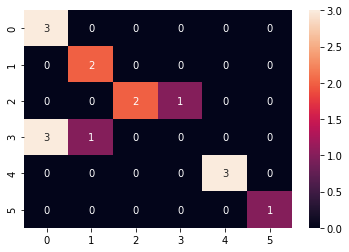

In [91]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [82]:
n1=Naive_data.shape[0]
print(n1)
seventy_per1=round(n1*.7)
print(seventy_per1)
thirty_per1=n1-seventy_per1
print(thirty_per1)
P1 = np.random.permutation(n1)
print(P1)

159
111
48
[ 35  78  20  65   5 136  55  91 114 145  81  15  79  82  52  89 125  64
 107  77  74  41 134 105 153  21 118 154  68  39 111  62  16 121  13 150
 128 143  84  36  98 124 131  75  51  92 113  69  45 133  30  14  50 137
 106  57  73  87   7   2  31  22 130  67  40 158 132  19  80  11 135  88
  95 141 140  90  32 151 103 156 142 115  70  47  18  54 152  56 139  27
   4  46  25  86   6  44 104 101  48   8 109  33  59 120  29  38  66 144
 110 117 119  60   0  58  37  24 100  42  12  28 138 116  97  17 129  53
 157  72  76 148  96 102  34 122  26  94 149 155 126  83 108 112  99 147
   9 127  61  23  43  49  10  71   1 146 123   3  85  63  93]


In [83]:
train_idx1 = P1[0:seventy_per1]
print(train_idx1)
test_idx1=P1[seventy_per1:]
print(test_idx1)

[ 35  78  20  65   5 136  55  91 114 145  81  15  79  82  52  89 125  64
 107  77  74  41 134 105 153  21 118 154  68  39 111  62  16 121  13 150
 128 143  84  36  98 124 131  75  51  92 113  69  45 133  30  14  50 137
 106  57  73  87   7   2  31  22 130  67  40 158 132  19  80  11 135  88
  95 141 140  90  32 151 103 156 142 115  70  47  18  54 152  56 139  27
   4  46  25  86   6  44 104 101  48   8 109  33  59 120  29  38  66 144
 110 117 119]
[ 60   0  58  37  24 100  42  12  28 138 116  97  17 129  53 157  72  76
 148  96 102  34 122  26  94 149 155 126  83 108 112  99 147   9 127  61
  23  43  49  10  71   1 146 123   3  85  63  93]


In [84]:
X1=Naive_data.iloc[:,0:] 
Y1=Naive_data.iloc[:,0]  

In [85]:
X1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


In [86]:
Y1

0      0
1      0
2      0
3      0
4      0
      ..
154    6
155    6
156    6
157    6
158    6
Name: Species, Length: 159, dtype: int64

In [87]:
X_train1 = X1.iloc[train_idx1,:]
X_test1 = X1.iloc[test_idx1,1:].values
print(X_train1)
print("======================================================")
print(X_test1)
print("======================================================")
Y_train1 = Y1.iloc[train_idx1]
Y_test1 = Y1.iloc[test_idx1].values
print(Y_train1)
print("======================================================")
print(Y_test1)

     Species  Weight  Length1  Length2  Length3   Height   Width
35         1    40.0     12.9     14.1     16.2   4.1472  2.2680
78         4    78.0     16.8     18.7     19.4   5.1992  3.1234
20         0   575.0     31.3     34.0     39.5  15.1285  5.5695
65         3   150.0     18.4     20.0     22.4   8.8928  3.2928
5          0   450.0     26.8     29.7     34.7  13.6024  4.9274
..       ...     ...      ...      ...      ...      ...     ...
66         3   140.0     19.0     20.7     23.2   8.5376  3.2944
144        5  1650.0     59.0     63.4     68.0  10.8120  7.4800
110        4   556.0     32.0     34.5     36.5  10.2565  6.3875
117        4   650.0     36.5     39.0     41.4  11.1366  6.0030
119        4   850.0     36.9     40.0     42.3  11.9286  7.1064

[111 rows x 7 columns]
[[1000.       37.3      40.       43.5      12.354     6.525 ]
 [ 242.       23.2      25.4      30.       11.52      4.02  ]
 [ 540.       28.5      31.       34.       10.744     6.562 ]
 [  78.

In [88]:
Y_pred11 = naive_bayes_gaussian(X_train1 , X=X_test1, Y="Species")
print(Y_pred11)

[0 4 2 1 0 1 1 0 0 5 5 1 0 4 2 6 6 1 6 1 2 0 0 0 1 6 6 5 1 2 0 1 6 0 5 1 0
 1 1 0 4 4 6 5 2 1 3 1]


In [89]:
print(confusion_matrix(Y_test1, Y_pred11))
print(np.trace(confusion_matrix(Y_test1, Y_pred11)) / np.sum(confusion_matrix(Y_test1, Y_pred11)))

[[9 0 1 0 2 0 0]
 [0 4 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 1 0 1 1 0 0]
 [2 9 2 0 0 4 1]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 6]]
0.4583333333333333


<AxesSubplot:>

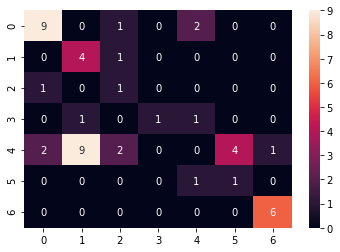

In [90]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test1, Y_pred11), annot=True)

Text(0, 0.5, 'Accuracy')

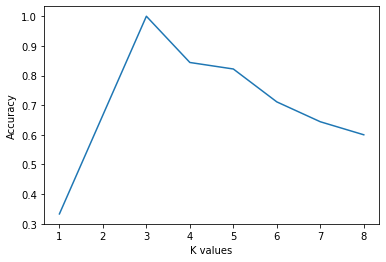

In [68]:
k=[1,2,3,4,5,6,7,8]
acc=[.333,.6667,1,.844,.822,.711,.644,.60]
plt.plot(k,acc)
plt.xlabel("K values")
plt.ylabel("Accuracy") 